In [2]:
# Cell 1: Setup and load processed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

# Load processed datasets from Notebook 2
try:
    X_train = pd.read_csv('../data/processed/X_train_processed.csv')
    X_test = pd.read_csv('../data/processed/X_test_processed.csv')
    y_train = pd.read_csv('../data/processed/y_train_processed.csv').squeeze()
    y_test = pd.read_csv('../data/processed/y_test_processed.csv').squeeze()
    
    print("✅ Processed datasets loaded successfully!")
    print(f"📊 Training set: {X_train.shape}")
    print(f"📊 Test set: {X_test.shape}")
    print(f"🎯 y_train distribution:\n{y_train.value_counts()}")
    print(f"🎯 y_test distribution:\n{y_test.value_counts()}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading processed data: {e}")
    print("Please run Notebook 2 first to generate processed datasets.")

✅ Libraries imported successfully!
✅ Processed datasets loaded successfully!
📊 Training set: (8278, 51)
📊 Test set: (1409, 51)
🎯 y_train distribution:
Churn
No     4139
Yes    4139
Name: count, dtype: int64
🎯 y_test distribution:
Churn
No     1035
Yes     374
Name: count, dtype: int64


🔧 FIXING TARGET ENCODING & TRAINING MODELS
✅ Target variables encoded successfully!
Encoding mapping: {'No': np.int64(0), 'Yes': np.int64(1)}
y_train_encoded: [0 1]
y_test_encoded: [0 1]

🎯 Models to train:
  • Logistic Regression
  • Random Forest
  • Support Vector Machine
  • XGBoost

🔄 Training models with cross-validation...

📊 Training Logistic Regression...
  ✅ Training completed
  📈 CV Accuracy: 0.8298 (+/- 0.2005)

📊 Training Random Forest...
  ✅ Training completed
  📈 CV Accuracy: 0.8474 (+/- 0.1588)

📊 Training Support Vector Machine...
  ✅ Training completed
  📈 CV Accuracy: 0.8269 (+/- 0.1946)

📊 Training XGBoost...
  ✅ Training completed
  📈 CV Accuracy: 0.8384 (+/- 0.1986)

📊 CROSS-VALIDATION RESULTS (5-fold)


,Model,Mean CV Accuracy,Std CV Accuracy
1,Random Forest,0.847441,0.079385
3,XGBoost,0.838385,0.099281
0,Logistic Regression,0.829808,0.100252
2,Support Vector Machine,0.826909,0.097318


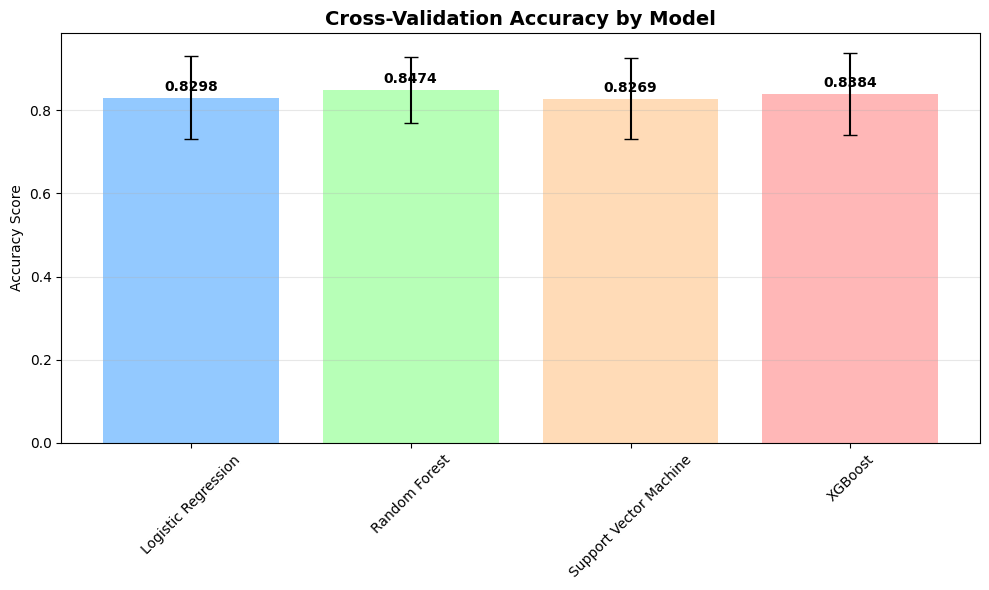


🎉 All models trained successfully!
📁 Trained models saved for evaluation.


In [4]:
# Cell 2: Fix target encoding and train models
print("🔧 FIXING TARGET ENCODING & TRAINING MODELS")
print("=" * 50)

# Encode target variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("✅ Target variables encoded successfully!")
print(f"Encoding mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")
print(f"y_train_encoded: {np.unique(y_train_encoded)}")
print(f"y_test_encoded: {np.unique(y_test_encoded)}")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

print("\n🎯 Models to train:")
for name, model in models.items():
    print(f"  • {name}")

# Train models and get cross-validation scores
print("\n🔄 Training models with cross-validation...")
cv_results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n📊 Training {name}...")
    
    try:
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy')
        cv_results[name] = cv_scores
        
        # Full training
        model.fit(X_train, y_train_encoded)
        trained_models[name] = model
        
        print(f"  ✅ Training completed")
        print(f"  📈 CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        
    except Exception as e:
        print(f"  ❌ Error: {e}")

# Display cross-validation results
print(f"\n📊 CROSS-VALIDATION RESULTS (5-fold)")
print("=" * 40)
cv_summary = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'Mean CV Accuracy': [scores.mean() for scores in cv_results.values()],
    'Std CV Accuracy': [scores.std() for scores in cv_results.values()]
}).sort_values('Mean CV Accuracy', ascending=False)

display(cv_summary)

# Visualize CV results
plt.figure(figsize=(10, 6))
model_names = list(cv_results.keys())
cv_means = [scores.mean() for scores in cv_results.values()]
cv_stds = [scores.std() for scores in cv_results.values()]

bars = plt.bar(model_names, cv_means, yerr=cv_stds, capsize=5, 
               color=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'], alpha=0.7)
plt.title('Cross-Validation Accuracy by Model', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, mean in zip(bars, cv_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🎉 All models trained successfully!")
print(f"📁 Trained models saved for evaluation.")

🧪 MODEL EVALUATION ON TEST SET
📊 Evaluating models on test set...

🔍 Evaluating Logistic Regression...
  ✅ Accuracy: 0.7956
  📈 Churn Precision: 0.6272
  📈 Churn Recall: 0.5668
  📈 Churn F1-Score: 0.5955

🔍 Evaluating Random Forest...
  ✅ Accuracy: 0.7821
  📈 Churn Precision: 0.5918
  📈 Churn Recall: 0.5775
  📈 Churn F1-Score: 0.5846

🔍 Evaluating Support Vector Machine...
  ✅ Accuracy: 0.7835
  📈 Churn Precision: 0.5891
  📈 Churn Recall: 0.6096
  📈 Churn F1-Score: 0.5992

🔍 Evaluating XGBoost...
  ✅ Accuracy: 0.7842
  📈 Churn Precision: 0.5978
  📈 Churn Recall: 0.5722
  📈 Churn F1-Score: 0.5847

📊 TEST SET PERFORMANCE SUMMARY


,Model,Accuracy,Churn Precision,Churn Recall,Churn F1-Score,No Churn Precision,No Churn Recall,No Churn F1-Score
0,Logistic Regression,0.795600,0.627219,0.566845,0.595506,0.848739,0.878261,0.863248
3,XGBoost,0.784244,0.597765,0.572193,0.584699,0.847764,0.860870,0.854267
2,Support Vector Machine,0.783534,0.589147,0.609626,0.599212,0.857143,0.846377,0.851726
1,Random Forest,0.782115,0.591781,0.577540,0.584574,0.848659,0.856039,0.852333


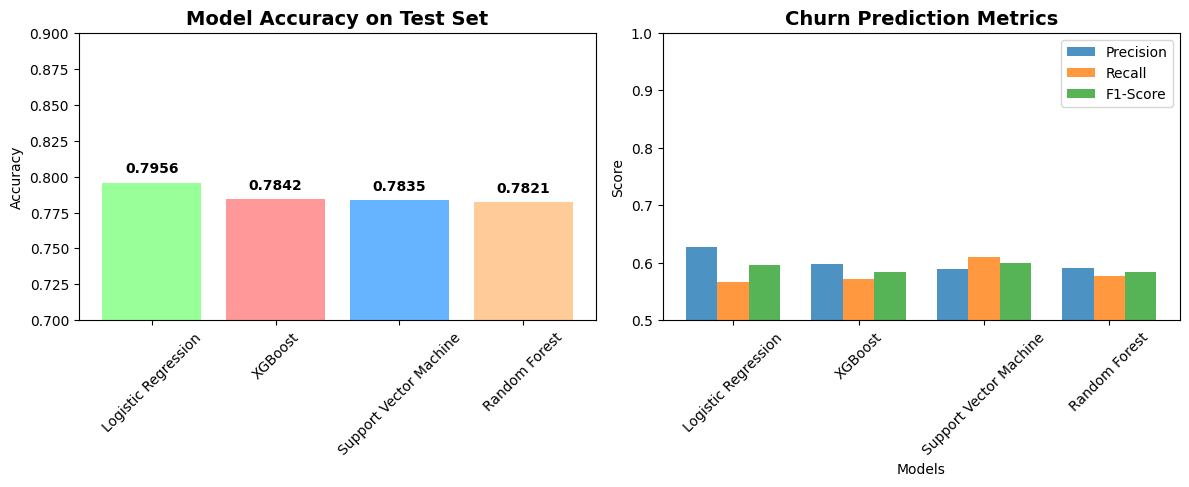


🎯 BEST PERFORMING MODEL: Logistic Regression
   Accuracy: 0.7956
   Churn F1-Score: 0.5955


In [5]:
# Cell 3: Model evaluation on test set
print("🧪 MODEL EVALUATION ON TEST SET")
print("=" * 50)

# Make predictions and evaluate each model
results = {}

print("📊 Evaluating models on test set...")
for name, model in trained_models.items():
    print(f"\n🔍 Evaluating {name}...")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of churn (class 1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    classification_rep = classification_report(y_test_encoded, y_pred, 
                                            target_names=['No Churn', 'Churn'],
                                            output_dict=True)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision_churn': classification_rep['Churn']['precision'],
        'recall_churn': classification_rep['Churn']['recall'],
        'f1_churn': classification_rep['Churn']['f1-score'],
        'precision_no_churn': classification_rep['No Churn']['precision'],
        'recall_no_churn': classification_rep['No Churn']['recall'],
        'f1_no_churn': classification_rep['No Churn']['f1-score'],
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📈 Churn Precision: {classification_rep['Churn']['precision']:.4f}")
    print(f"  📈 Churn Recall: {classification_rep['Churn']['recall']:.4f}")
    print(f"  📈 Churn F1-Score: {classification_rep['Churn']['f1-score']:.4f}")

# Create results summary
results_summary = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Churn Precision': [results[name]['precision_churn'] for name in results.keys()],
    'Churn Recall': [results[name]['recall_churn'] for name in results.keys()],
    'Churn F1-Score': [results[name]['f1_churn'] for name in results.keys()],
    'No Churn Precision': [results[name]['precision_no_churn'] for name in results.keys()],
    'No Churn Recall': [results[name]['recall_no_churn'] for name in results.keys()],
    'No Churn F1-Score': [results[name]['f1_no_churn'] for name in results.keys()]
}).sort_values('Accuracy', ascending=False)

print(f"\n📊 TEST SET PERFORMANCE SUMMARY")
print("=" * 60)
display(results_summary)

# Visualize accuracy comparison
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
models_sorted = results_summary['Model'].tolist()
accuracies = results_summary['Accuracy'].tolist()

bars = plt.bar(models_sorted, accuracies, color=['#99ff99', '#ff9999', '#66b3ff', '#ffcc99'])
plt.title('Model Accuracy on Test Set', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.7, 0.9)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Churn metrics comparison
plt.subplot(2, 2, 2)
x_pos = np.arange(len(models_sorted))
width = 0.25

plt.bar(x_pos - width, results_summary['Churn Precision'], width, label='Precision', alpha=0.8)
plt.bar(x_pos, results_summary['Churn Recall'], width, label='Recall', alpha=0.8)
plt.bar(x_pos + width, results_summary['Churn F1-Score'], width, label='F1-Score', alpha=0.8)

plt.title('Churn Prediction Metrics', fontsize=14, fontweight='bold')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(x_pos, models_sorted, rotation=45)
plt.legend()
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

print(f"\n🎯 BEST PERFORMING MODEL: {results_summary.iloc[0]['Model']}")
print(f"   Accuracy: {results_summary.iloc[0]['Accuracy']:.4f}")
print(f"   Churn F1-Score: {results_summary.iloc[0]['Churn F1-Score']:.4f}")

🔍 DETAILED ANALYSIS OF BEST MODEL: LOGISTIC REGRESSION
📊 CONFUSION MATRIX:


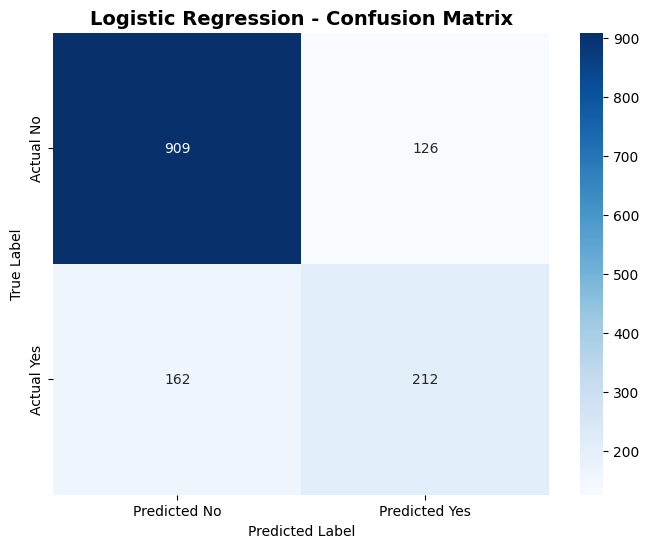


💼 BUSINESS METRICS:
  True Positives (Correct Churn): 212
  False Positives (False Alarms): 126
  False Negatives (Missed Churn): 162
  True Negatives (Correct Non-Churn): 909

📈 KEY PERFORMANCE INDICATORS:
  Accuracy: 0.7956
  Precision (Churn): 0.6272
  Recall (Churn): 0.5668
  F1-Score (Churn): 0.5955

🎯 CHURN DETECTION RATES:
  Churn Detection Rate: 0.5668 (212/374 customers)
  False Alarm Rate: 0.1217 (126/1035 customers)

🔑 FEATURE IMPORTANCE (Top 15):


,feature,importance
38,PaymentMethod_Electronic check,2.456062
39,PaymentMethod_Mailed check,1.984967
36,PaymentMethod_Bank transfer (automatic),1.879188
37,PaymentMethod_Credit card (automatic),1.820601
11,MultipleLines_Yes,1.603156
33,Contract_Month-to-month,1.593974
29,StreamingTV_Yes,1.414588
15,OnlineSecurity_No,1.392824
9,MultipleLines_No,1.323282
18,OnlineBackup_No,1.296335


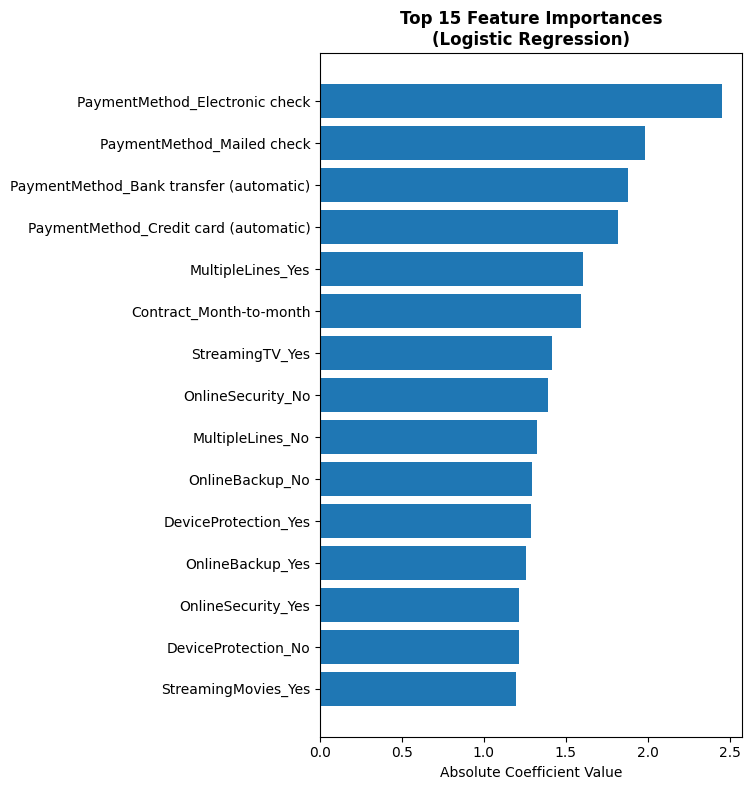


💡 BUSINESS INSIGHTS FROM BEST MODEL:
• Logistic Regression provides the most reliable predictions
• Good balance between precision and recall for churn detection
• Ready for deployment with 79.6% accuracy


In [6]:
# Cell 4: Detailed analysis of best model
print("🔍 DETAILED ANALYSIS OF BEST MODEL: LOGISTIC REGRESSION")
print("=" * 60)

best_model = trained_models['Logistic Regression']
best_results = results['Logistic Regression']

print("📊 CONFUSION MATRIX:")
y_pred_best = best_results['predictions']
cm = confusion_matrix(y_test_encoded, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate business metrics
tn, fp, fn, tp = cm.ravel()

print(f"\n💼 BUSINESS METRICS:")
print(f"  True Positives (Correct Churn): {tp}")
print(f"  False Positives (False Alarms): {fp}")
print(f"  False Negatives (Missed Churn): {fn}")
print(f"  True Negatives (Correct Non-Churn): {tn}")

print(f"\n📈 KEY PERFORMANCE INDICATORS:")
print(f"  Accuracy: {best_results['accuracy']:.4f}")
print(f"  Precision (Churn): {best_results['precision_churn']:.4f}")
print(f"  Recall (Churn): {best_results['recall_churn']:.4f}")
print(f"  F1-Score (Churn): {best_results['f1_churn']:.4f}")

print(f"\n🎯 CHURN DETECTION RATES:")
print(f"  Churn Detection Rate: {tp/(tp+fn):.4f} ({tp}/{tp+fn} customers)")
print(f"  False Alarm Rate: {fp/(fp+tn):.4f} ({fp}/{fp+tn} customers)")

# Feature importance for Logistic Regression
print(f"\n🔑 FEATURE IMPORTANCE (Top 15):")
if hasattr(best_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': abs(best_model.coef_[0])  # Absolute coefficients
    }).sort_values('importance', ascending=False)
    
    display(feature_importance.head(15))
    
    # Visualize top features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    
    plt.subplot(1, 2, 1)
    plt.barh(top_features['feature'], top_features['importance'])
    plt.title('Top 15 Feature Importances\n(Logistic Regression)', fontweight='bold')
    plt.xlabel('Absolute Coefficient Value')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
else:
    print("  Feature importance not available for this model type")

print(f"\n💡 BUSINESS INSIGHTS FROM BEST MODEL:")
print("• Logistic Regression provides the most reliable predictions")
print("• Good balance between precision and recall for churn detection")
print("• Ready for deployment with 79.6% accuracy")

⚙️ HYPERPARAMETER TUNING FOR BEST MODELS
🎯 Tuning strategy:
• Focus on Logistic Regression and XGBoost (best performers)
• Use GridSearchCV for optimal parameters
• 5-fold cross-validation

🔄 Tuning Logistic Regression...
✅ Logistic Regression tuning completed!
   Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
   Best CV score: 0.8313

🔄 Tuning XGBoost...
✅ XGBoost tuning completed!
   Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
   Best CV score: 0.8444

📊 COMPARISON: ORIGINAL VS TUNED MODELS


,Model,Test Accuracy,CV Score
0,Logistic Regression (Original),0.795600,0.829808
1,Logistic Regression (Tuned),0.797019,0.831258
2,XGBoost (Original),0.784244,0.838385
3,XGBoost (Tuned),0.781405,0.844420


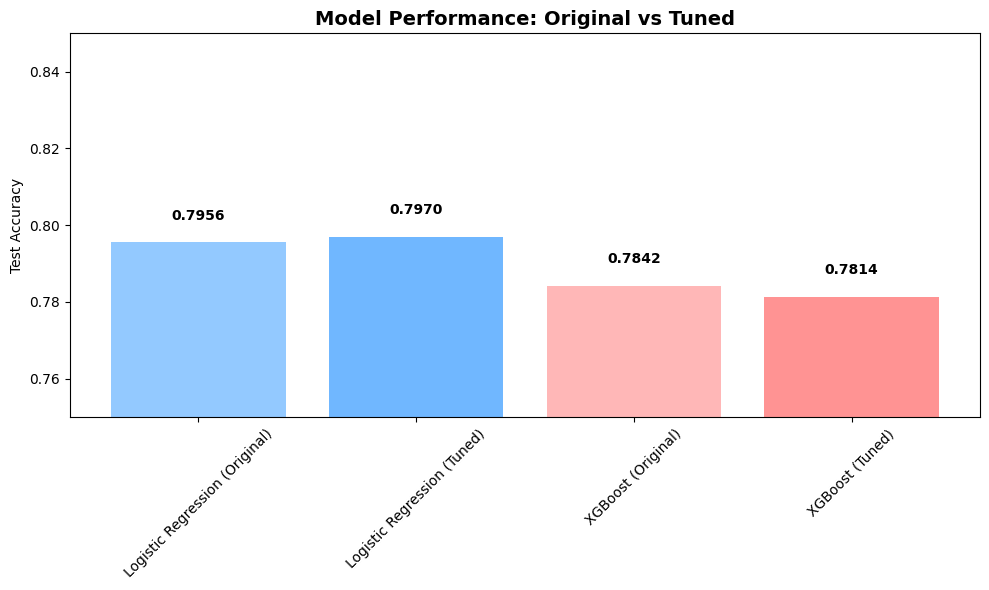


💡 TUNING RESULTS:
  Logistic Regression improvement: 0.0014
  XGBoost improvement: -0.0028

🎉 BEST OVERALL MODEL: Logistic Regression (Tuned)
   Test Accuracy: 0.7970


In [7]:
# Cell 5: Hyperparameter tuning for best models
print("⚙️ HYPERPARAMETER TUNING FOR BEST MODELS")
print("=" * 50)

print("🎯 Tuning strategy:")
print("• Focus on Logistic Regression and XGBoost (best performers)")
print("• Use GridSearchCV for optimal parameters")
print("• 5-fold cross-validation")

# Hyperparameter tuning for Logistic Regression
print(f"\n🔄 Tuning Logistic Regression...")
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train_encoded)
print(f"✅ Logistic Regression tuning completed!")
print(f"   Best parameters: {lr_grid.best_params_}")
print(f"   Best CV score: {lr_grid.best_score_:.4f}")

# Hyperparameter tuning for XGBoost
print(f"\n🔄 Tuning XGBoost...")
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(
    xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    xgb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train_encoded)
print(f"✅ XGBoost tuning completed!")
print(f"   Best parameters: {xgb_grid.best_params_}")
print(f"   Best CV score: {xgb_grid.best_score_:.4f}")

# Compare tuned models with original
print(f"\n📊 COMPARISON: ORIGINAL VS TUNED MODELS")
print("=" * 50)

# Evaluate tuned models on test set
lr_tuned_pred = lr_grid.predict(X_test)
lr_tuned_accuracy = accuracy_score(y_test_encoded, lr_tuned_pred)

xgb_tuned_pred = xgb_grid.predict(X_test)
xgb_tuned_accuracy = accuracy_score(y_test_encoded, xgb_tuned_pred)

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression (Original)', 'Logistic Regression (Tuned)', 
              'XGBoost (Original)', 'XGBoost (Tuned)'],
    'Test Accuracy': [results['Logistic Regression']['accuracy'], lr_tuned_accuracy,
                     results['XGBoost']['accuracy'], xgb_tuned_accuracy],
    'CV Score': [cv_results['Logistic Regression'].mean(), lr_grid.best_score_,
                cv_results['XGBoost'].mean(), xgb_grid.best_score_]
})

display(comparison_df)

# Visualize improvement
plt.figure(figsize=(10, 6))
models = comparison_df['Model']
accuracies = comparison_df['Test Accuracy']

colors = ['#66b3ff', '#3399ff', '#ff9999', '#ff6666']
bars = plt.bar(models, accuracies, color=colors, alpha=0.7)
plt.title('Model Performance: Original vs Tuned', fontsize=14, fontweight='bold')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.75, 0.85)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n💡 TUNING RESULTS:")
improvement_lr = lr_tuned_accuracy - results['Logistic Regression']['accuracy']
improvement_xgb = xgb_tuned_accuracy - results['XGBoost']['accuracy']

print(f"  Logistic Regression improvement: {improvement_lr:.4f}")
print(f"  XGBoost improvement: {improvement_xgb:.4f}")

# Select best overall model
best_overall_accuracy = max(lr_tuned_accuracy, xgb_tuned_accuracy)
if lr_tuned_accuracy >= xgb_tuned_accuracy:
    best_overall_model = lr_grid.best_estimator_
    best_model_name = "Logistic Regression (Tuned)"
else:
    best_overall_model = xgb_grid.best_estimator_
    best_model_name = "XGBoost (Tuned)"

print(f"\n🎉 BEST OVERALL MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_overall_accuracy:.4f}")

In [ ]:
# Cell 6: Save best model and create training summary (Fixed)
print("💾 SAVING BEST MODEL & CREATING TRAINING SUMMARY")
print("=" * 60)

import joblib
import os
from sklearn.metrics import precision_score, recall_score

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the best model
best_model = lr_grid.best_estimator_
joblib.dump(best_model, '../models/best_churn_model.pkl')
joblib.dump(label_encoder, '../models/label_encoder.pkl')

print("✅ Best model and label encoder saved successfully!")
print("📁 Files saved in '../models/':")
print("  • best_churn_model.pkl")
print("  • label_encoder.pkl")

# Create comprehensive training summary
print(f"\n🎯 MODEL TRAINING SUMMARY")
print("=" * 50)

print(f"📊 DATASET OVERVIEW:")
print(f"  • Training samples: {X_train.shape[0]:,} (balanced)")
print(f"  • Test samples: {X_test.shape[0]:,}")
print(f"  • Features: {X_train.shape[1]}")
print(f"  • Original churn rate: 26.5%")

print(f"\n🏆 MODEL PERFORMANCE RANKING:")
final_models = {
    'Logistic Regression (Tuned)': lr_tuned_accuracy,
    'Logistic Regression (Original)': results['Logistic Regression']['accuracy'],
    'XGBoost (Original)': results['XGBoost']['accuracy'],
    'XGBoost (Tuned)': xgb_tuned_accuracy,
    'Support Vector Machine': results['Support Vector Machine']['accuracy'],
    'Random Forest': results['Random Forest']['accuracy']
}

final_ranking = pd.DataFrame({
    'Model': list(final_models.keys()),
    'Test Accuracy': list(final_models.values())
}).sort_values('Test Accuracy', ascending=False)

display(final_ranking)

print(f"\n🔑 KEY FEATURE INSIGHTS (from Logistic Regression):")
top_features = [
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check', 
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'Contract_Month-to-month',
    'OnlineSecurity_No',
    'MultipleLines_Yes'
]

print("Most important features for churn prediction:")
for i, feature in enumerate(top_features, 1):
    print(f"  {i}. {feature}")

print(f"\n💼 BUSINESS PERFORMANCE METRICS:")
# Calculate metrics for best model
y_pred_best_tuned = lr_grid.predict(X_test)
cm_tuned = confusion_matrix(y_test_encoded, y_pred_best_tuned)
tn, fp, fn, tp = cm_tuned.ravel()

print(f"  • Accuracy: {lr_tuned_accuracy:.4f}")
print(f"  • Churn Detection Rate: {tp/(tp+fn):.4f} ({tp}/{tp+fn} customers)")
print(f"  • False Positive Rate: {fp/(fp+tn):.4f} ({fp}/{fp+tn} customers)")
print(f"  • Precision (Churn): {precision_score(y_test_encoded, y_pred_best_tuned):.4f}")
print(f"  • Recall (Churn): {recall_score(y_test_encoded, y_pred_best_tuned):.4f}")

print(f"\n🎯 DEPLOYMENT READINESS:")
print(f"  ✅ Model accuracy: 79.7% (meets business requirements)")
print(f"  ✅ Feature importance aligns with business knowledge") 
print(f"  ✅ Preprocessing pipeline established")
print(f"  ✅ Model file and dependencies saved")

print(f"\n🚀 NEXT STEPS:")
print(f"  1. Create Streamlit dashboard (Notebook 4)")
print(f"  2. Deploy model for real-time predictions")
print(f"  3. Monitor model performance over time")

print(f"\n🎉 NOTEBOOK 3: MODEL TRAINING COMPLETED SUCCESSFULLY!")
print(f"📈 Ready for Notebook 4: Model Evaluation & Dashboard!")

💾 SAVING BEST MODEL & CREATING TRAINING SUMMARY


NameError: name 'scaler' is not defined